# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import random
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here
def roller():
    lst = []
    for i in range(10):
        i = random.randint(1,6)
        lst.append(i)
    return lst

outcome = pd.DataFrame(roller())

#result_list_sorted
result_list = roller()
print(result_list)
print(outcome)
print(sorted(result_list))
print(outcome.head(15))

[5, 5, 2, 6, 3, 5, 3, 2, 3, 2]
   0
0  5
1  2
2  6
3  1
4  4
5  2
6  3
7  2
8  4
9  2
[2, 2, 2, 3, 3, 3, 5, 5, 5, 6]
   0
0  5
1  2
2  6
3  1
4  4
5  2
6  3
7  2
8  4
9  2


#### 2.- Plot the results sorted by value.

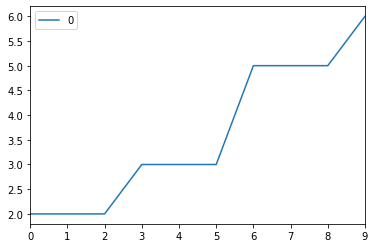

In [6]:
# your code here
result_list_sorted = sorted(result_list)
sorted_outcome = pd.DataFrame(result_list_sorted)
sorted_outcome.plot()

# The results are sorted and plotted depending on each roll's value. The graph does however range from 0-9 instead of 1-10.

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

'\nThe frequency distribution counts the frequency of each value whereas the plot above shows the value of each roll.\n'

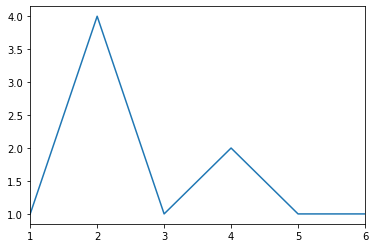

In [7]:
freq_count = outcome[0].value_counts()
freq_count = freq_count.sort_index(ascending = True)
freq_count.plot()

"""
The frequency distribution counts the frequency of each value whereas the plot above shows the value of each roll.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def mean_func(s):
    mean = s.sum()/s.count()
    return mean

print(mean_func(outcome))

0    3.1
dtype: float64


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
calc_freq_dist = sum(outcome[0])
freq_mean = calc_freq_dist / 10

freq_mean

# Not sure what ca lculate the frequency distribution means. Can't find anything about it online, just find examples of how to 
# make a frequency distribution table

3.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
sorted_results = (sorted(result_list))

def median_finder(values):
    x = (len(values) / 2)
    if x == int:
        median = ((values[x-1] + values[x])/2)
    else:
        x = x + 0.5
        x = int(x)
        median = values[x]
    return median

print(median_finder(sorted_results))


3


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def quartile_finder(values, median_finder):
    x = (len(values) / 4)
    if x == int:
        Q_25 = ((values[x-1] + values[x])/2)
        Q_50 = median_finder
        Q_75 = ((values[x*3-1] + values[x*3])/2)
    else:
        x + 0.5
        x = int(x)
        Q_25 = values[x]
        Q_50 = median_finder
        Q_75 = values[x*3]
        
    return Q_25, Q_50, Q_75
        
print(quartile_finder(sorted_results, median_finder(sorted_results)))
# It does not return the correct value for some reason.

(2, 3, 5)


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

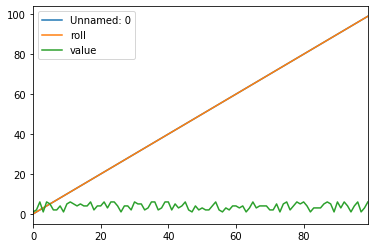

In [47]:
# your code here
roll_the_dice_hundred = pd.read_csv("../data/roll_the_dice_hundred.csv")

hundred_dice_sorted = sorted(roll_the_dice_hundred)

roll_the_dice_hundred.plot()
# I can't plot the sorted list as 'list' has no attribute 'plot'

In [13]:
"""
A graph with three variables. One unnamed without any values. One for cummulative rolls ranging begining at 0, ending at 100.
One for value going up and down between 0 and 6 but exact value is difficult to see due to the y-axis ranging from 0-100.
"""

'\nA graph with three variables. One unnamed without any values. One for cummulative rolls ranging begining at 0, ending at 100.\nOne for value going up and down between 0 and 6 but exact value is difficult to see due to the y-axis ranging from 0-100.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here
hundred_dice_mean_value = roll_the_dice_hundred.mean()
hundred_dice_mean_value

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

### 3.- Now, calculate the frequency distribution.


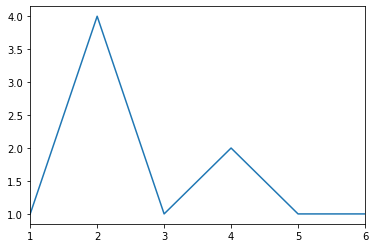

In [38]:
# your code here
hundred_dice = pd.DataFrame(roll_the_dice_hundred)
hundred_dice.head
hundred_dice_freq = freq_count.sort_index()
hundred_dice_freq
hundred_dice_freq.plot()
#freq_count

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258182C02E8>,
      dtype=object)

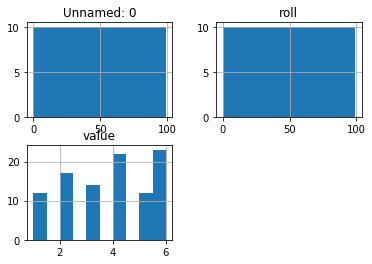

In [39]:
# your code here
hundred_dice.hist()

In [ ]:
"""
I get three histograms. The Unnamed and roll are unimodal from zero to houndred on x axis and 0 to 10 on y axis. 
The histogram for value has six bars, one for each dice side. The bar for five and six has however been smashed together
there is a small left and negative skew (caused by chance)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

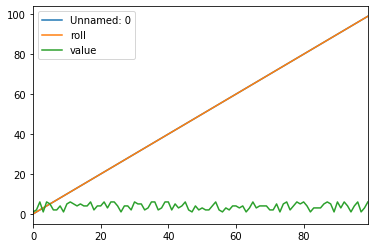

In [49]:
# your code here
roll_the_dice_hundred2 = pd.read_csv("../data/roll_the_dice_hundred.csv")
roll_the_dice_sorted2 = sorted(roll_the_dice_hundred2)
roll_the_dice_hundred2.plot()
# Again, doesnt work when sorted in a list. .plot also does not have an ascending condition.

In [ ]:
"""
It looks the same as before.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [51]:
# your code here
ages_population = pd.read_csv("../data/ages_population.csv")


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""